In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as s
% matplotlib inline

In [60]:
path = '../c_code/abc_smc_data/10k_0.1_0.01/'

In [61]:
data_0 = pd.read_csv(path + 'accepted_params_gen_1.csv')
data_1 = pd.read_csv(path + 'accepted_params_gen_6.csv')
data_2 = pd.read_csv(path + 'accepted_params_gen_7.csv')
data_3 = pd.read_csv(path + 'accepted_params_gen_8.csv')
data_4 = pd.read_csv(path + 'accepted_params_gen_9.csv')


data_list = [data_0, data_1, data_2, data_3, data_4]#, data_5]

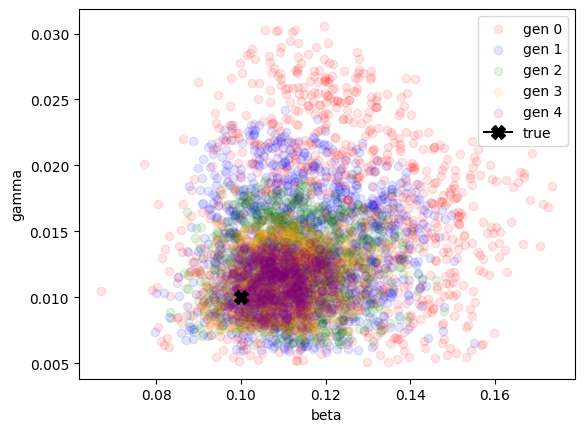

In [34]:
colors = ['red', 'blue', 'green', 'orange', 'purple']#, 'cyan']

for i, data in enumerate(data_list):
    plt.scatter(data['beta'], data['gamma'], color=colors[i], alpha=0.1, label='gen ' + str(i))
plt.plot(0.1, 0.01, marker='X', color='black', markersize=10, label='true')
plt.xlabel('beta')
plt.ylabel('gamma')
plt.legend(loc='upper right')
plt.show()

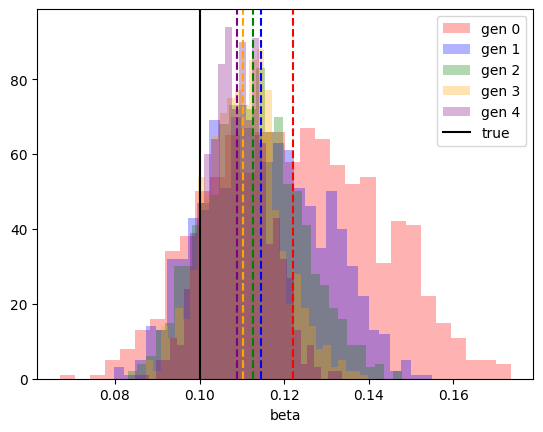

In [35]:
for i, data in enumerate(data_list):
    plt.hist(data['beta'], bins=30, color=colors[i], alpha=0.3, label='gen ' + str(i))
    plt.axvline(np.median(data['beta']), color=colors[i], linestyle='dashed')
plt.axvline(0.1, color='black', label='true')
plt.xlabel('beta')
plt.legend(loc='upper right')
plt.show()

In [18]:
abs(0.1-np.median(data_4['beta']))/0.1 * 100

np.float64(8.79085218753925)

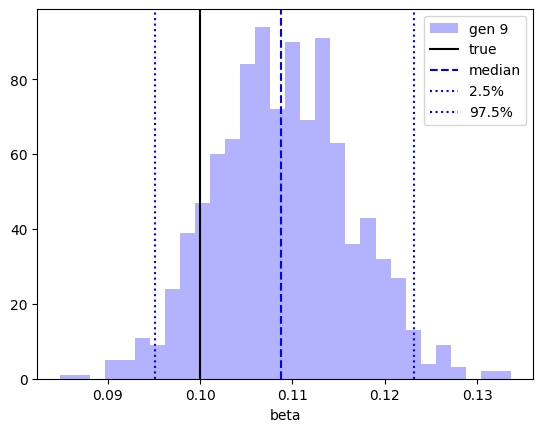

In [19]:
plt.hist(data_4['beta'], bins=30, color='blue', alpha=0.3, label='gen 9')
plt.axvline(0.1, color='black', label='true')
plt.axvline(np.median(data_4['beta']), color='blue', linestyle='dashed', label='median')
plt.axvline(np.percentile(data_4['beta'], 2.5), color='blue', linestyle='dotted', label='2.5%')
plt.axvline(np.percentile(data_4['beta'], 97.5), color='blue', linestyle='dotted', label='97.5%')
plt.xlabel('beta')
plt.legend(loc='upper right')
plt.show()


In [62]:
itera = pd.read_csv(path + 'generation_stats.csv')

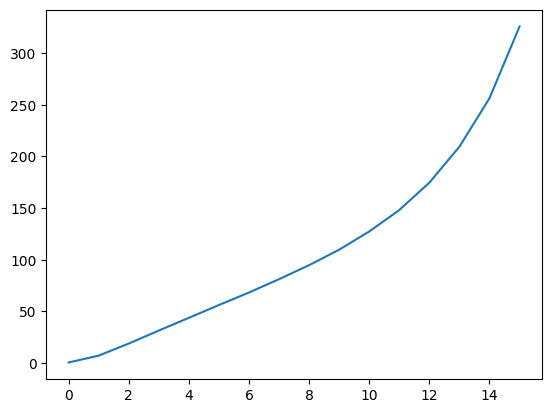

In [63]:
plt.plot(itera['exec_time'].cumsum())

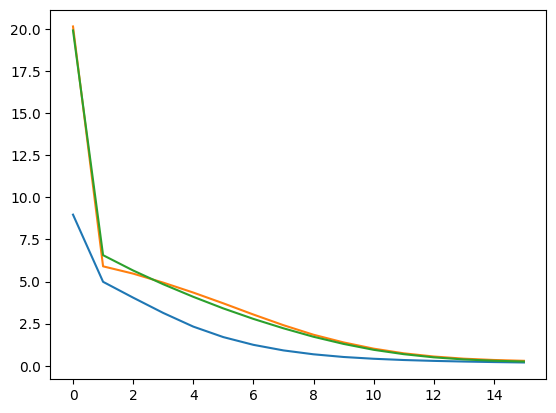

In [64]:
plt.plot(itera['tol_S'], label='tol_S')
plt.plot(itera['tol_I'], label='tol_I')
plt.plot(itera['tol_R'], label='tol_R')

In [65]:
data_14 = pd.read_csv(path + 'accepted_params_gen_15.csv')

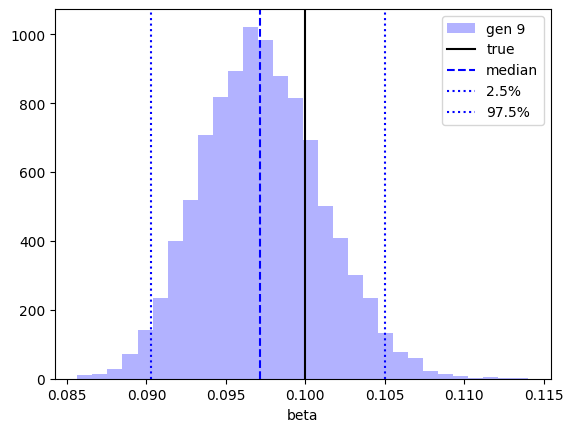

In [66]:
plt.hist(data_14['beta'], bins=30, color='blue', alpha=0.3, label='gen 9')
plt.axvline(0.1, color='black', label='true')
plt.axvline(np.median(data_14['beta']), color='blue', linestyle='dashed', label='median')
plt.axvline(np.percentile(data_14['beta'], 2.5), color='blue', linestyle='dotted', label='2.5%')
plt.axvline(np.percentile(data_14['beta'], 97.5), color='blue', linestyle='dotted', label='97.5%')
plt.xlabel('beta')
plt.legend(loc='upper right')
plt.show()

In [67]:
# Create empty lists to store results
gen_indices = []
beta_rel_errors = []
gamma_rel_errors = []

# True parameter values
true_beta = 0.1
true_gamma = 0.01

# Iterate through generations (0 to 15 based on itera DataFrame)
for i in range(16):
    try:
        # Read the file
        df = pd.read_csv(path + f'accepted_params_gen_{i}.csv')
        
        # Calculate medians
        beta_median = np.median(df['beta'])
        gamma_median = np.median(df['gamma'])
        
        # Calculate relative errors as percentages
        beta_rel_error = abs(true_beta - beta_median) / true_beta * 100
        gamma_rel_error = abs(true_gamma - gamma_median) / true_gamma * 100
        
        # Store results
        gen_indices.append(i)
        beta_rel_errors.append(beta_rel_error)
        gamma_rel_errors.append(gamma_rel_error)
        
    except FileNotFoundError:
        continue

# Create final DataFrame
results_df = pd.DataFrame({
    'generation': gen_indices,
    'beta_rel_error': beta_rel_errors,
    'gamma_rel_error': gamma_rel_errors
})

print(results_df)

    generation  beta_rel_error  gamma_rel_error
0            0         31.8410          100.000
1            1         80.5550          248.950
2            2         80.4385          217.530
3            3         48.4920          186.255
4            4         27.9010          140.625
5            5         14.1570          103.485
6            6          6.6035           72.050
7            7          1.6180           47.955
8            8          1.4325           31.460
9            9          3.1915           19.825
10          10          4.0395           12.680
11          11          4.3350            8.245
12          12          4.3340            6.320
13          13          4.0200            5.130
14          14          3.4960            4.700
15          15          2.8595            4.430


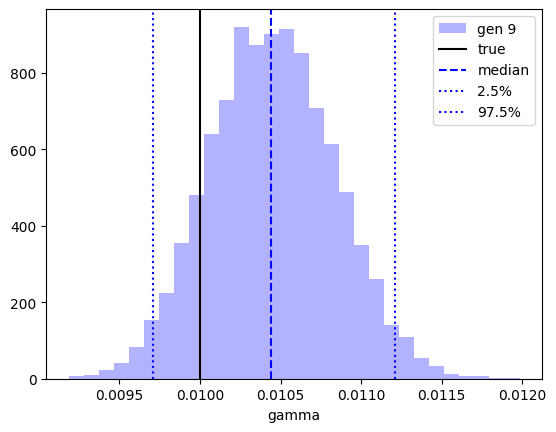

In [68]:
plt.hist(data_14['gamma'], bins=30, color='blue', alpha=0.3, label='gen 9')
plt.axvline(0.01, color='black', label='true')
plt.axvline(np.median(data_14['gamma']), color='blue', linestyle='dashed', label='median')
plt.axvline(np.percentile(data_14['gamma'], 2.5), color='blue', linestyle='dotted', label='2.5%')
plt.axvline(np.percentile(data_14['gamma'], 97.5), color='blue', linestyle='dotted', label='97.5%')
plt.xlabel('gamma')
plt.legend(loc='upper right')
plt.show()

In [69]:
data_14 = pd.read_csv(path + 'accepted_params_gen_15.csv')

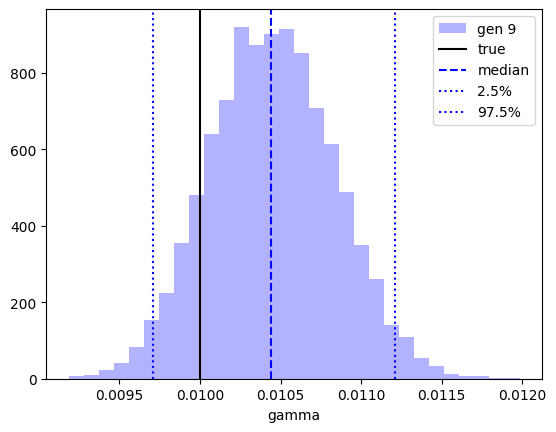

In [70]:
plt.hist(data_14['gamma'], bins=30, color='blue', alpha=0.3, label='gen 9')
plt.axvline(0.01, color='black', label='true')
plt.axvline(np.median(data_14['gamma']), color='blue', linestyle='dashed', label='median')
plt.axvline(np.percentile(data_14['gamma'], 2.5), color='blue', linestyle='dotted', label='2.5%')
plt.axvline(np.percentile(data_14['gamma'], 97.5), color='blue', linestyle='dotted', label='97.5%')
plt.xlabel('gamma')
plt.legend(loc='upper right')
plt.show()

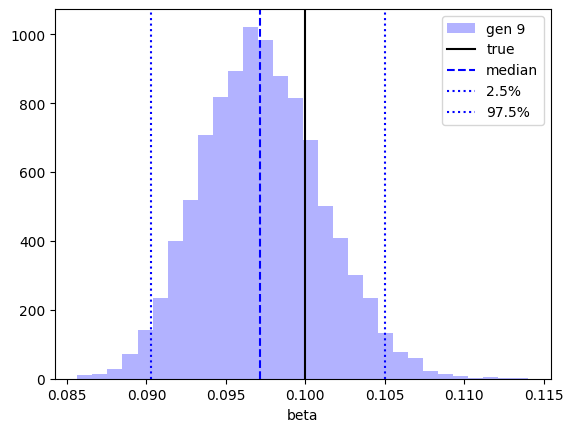

In [71]:
plt.hist(data_14['beta'], bins=30, color='blue', alpha=0.3, label='gen 9')
plt.axvline(0.1, color='black', label='true')
plt.axvline(np.median(data_14['beta']), color='blue', linestyle='dashed', label='median')
plt.axvline(np.percentile(data_14['beta'], 2.5), color='blue', linestyle='dotted', label='2.5%')
plt.axvline(np.percentile(data_14['beta'], 97.5), color='blue', linestyle='dotted', label='97.5%')
plt.xlabel('beta')
plt.legend(loc='upper right')
plt.show()

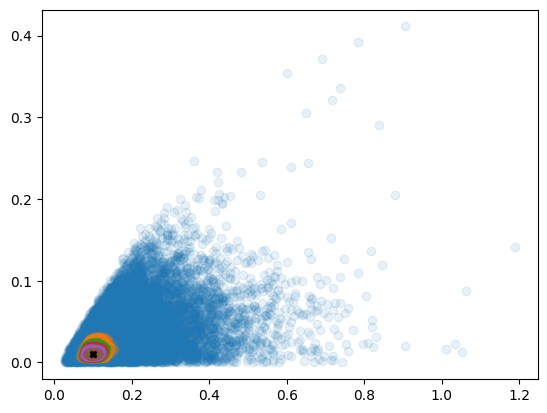

In [73]:
plt.plot(data_0['beta'], data_0['gamma'], 'o', alpha=0.1)
plt.plot(data_1['beta'], data_1['gamma'], 'o', alpha=0.1)
plt.plot(data_2['beta'], data_2['gamma'], 'o', alpha=0.1)
plt.plot(data_3['beta'], data_3['gamma'], 'o', alpha=0.1)
plt.plot(data_4['beta'], data_4['gamma'], 'o', alpha=0.1)
plt.plot(data_14['beta'], data_14['gamma'], 'o', alpha=0.1)
plt.plot(0.1, 0.01, 'X', color='black', markersize=5)